# 머신러닝

## 회귀( Regression )

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option( 'display.max_columns', 20 )

import warnings
warnings.filterwarnings( 'ignore' )

### 자동차 연비 예측 모델

#### 1. 데이터 준비

In [147]:
raw_df = pd.read_csv( '../data/auto-mpg-clean.csv' )
raw_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [148]:
df = raw_df.copy()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#### 특성 선택

In [149]:
df.drop( [ 'name', 'year', 'origin' ], axis = 1, inplace = True )
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504.0,12.0
1,15.0,8,350.0,165.0,3693.0,11.5
2,18.0,8,318.0,150.0,3436.0,11.0
3,16.0,8,304.0,150.0,3433.0,12.0
4,17.0,8,302.0,140.0,3449.0,10.5


In [150]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


#### 특성 상관 분석

In [151]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000


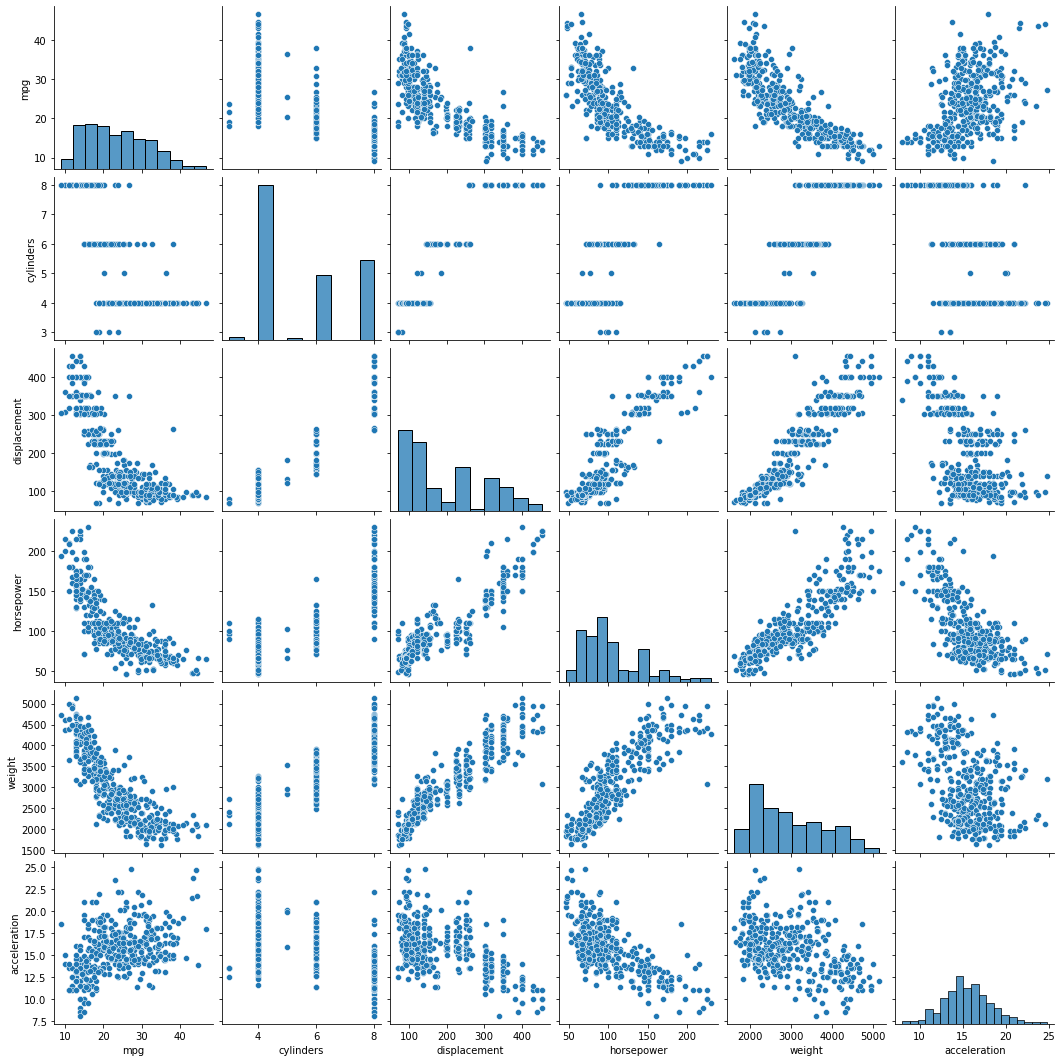

In [152]:
sns.pairplot( df )

#### 입력 데이터/정답 데이터 분리

In [153]:
X = np.asarray( df[ [ 'weight' ] ] )
y = np.asarray( df[ [ 'mpg' ] ] )

In [156]:
print( f'X shape : {X.shape}' )
print( f'y shape : {y.shape}' )

X shape : (392, 1)
y shape : (392, 1)


#### 훈련 데이터/테스트 데이터 분리

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split( X, y, 
        test_size = 0.2, random_state = 1234 )

In [160]:
print( f'X_train shape : {X_train.shape}' )
print( f'y_train shape : {y_train.shape}' )
print( f'\nX_test shape : {X_test.shape}' )
print( f'y_test shape : {y_test.shape}' )

X_train shape : (313, 1)
y_train shape : (313, 1)

X_test shape : (79, 1)
y_test shape : (79, 1)


#### 입력 데이터 정규화( MinMaxScaler )

In [161]:
from sklearn.preprocessing import MinMaxScaler

In [162]:
scaler = MinMaxScaler()
scaler.fit( X_train )
X_train_scaled = scaler.transform( X_train )
X_test_scaled = scaler.transform( X_test )

In [163]:
print( f'X_train_scaled mean : {X_train_scaled.mean()}' )
print( f'X_train_scaled var  : {X_train_scaled.var()}' )
print( f'\nX_test_scaled mean : {X_test_scaled.mean()}' )
print( f'X_test_scaled var  : {X_test_scaled.var()}' )

X_train_scaled mean : 0.4092062628871819
X_train_scaled var  : 0.06106663735396289

X_test_scaled mean : 0.379630876499985
X_test_scaled var  : 0.06918271601383139


#### 선형 회귀 모델 생성

In [164]:
from sklearn.linear_model import LinearRegression

In [165]:
model = LinearRegression()
model.fit( X_train_scaled, y_train )

LinearRegression()

#### 선형 회귀 모델 평가

In [166]:
r_square = model.score( X_test_scaled, y_test )
print( f'결정계수( R-제곱 ) : {r_square}' )

결정계수( R-제곱 ) : 0.680198235974008


In [167]:
# 직선의 방정식 : y = wx + b
print( f'단순 선형 회귀 모델 W( Weight ) : {model.coef_}' )
print( f'단순 선형 회귀 모델 b( bias ) : {model.intercept_}' )

단순 선형 회귀 모델 W( Weight ) : [[-25.66547603]]
단순 선형 회귀 모델 b( bias ) : [33.71812848]


In [168]:
from sklearn.model_selection import cross_val_score

In [170]:
X_scaled = scaler.transform( X )
scores = cross_val_score( model, X_scaled, y, scoring = 'accuracy', cv = 3 )
print( f'교차 검증별 정확도 : {np.round( scores, 4 ) }' )
print( f'평균 검증 정확도 : {np.round( np.mean( scores ), 4 )}' )

교차 검증별 정확도 : [nan nan nan]
평균 검증 정확도 : nan


#### 선형 회귀 모델 예측 평가

In [139]:
y_predict = model.predict( X_test_scaled ) # 생성된 모델로 예측 

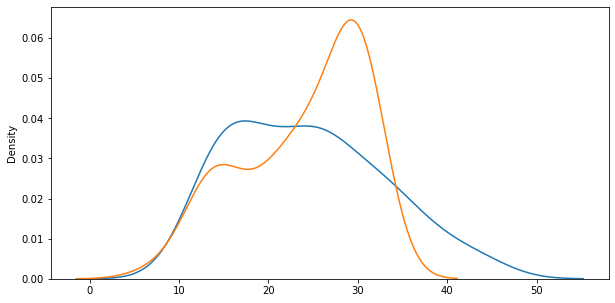

In [140]:
plt.figure( figsize = ( 10, 5 ) )
ax1 = sns.distplot( y_test, hist = False, label = 'y_test' )
ax2 = sns.distplot( y_predict, hist = False, label = 'y_predict', 
                    ax = ax1 ) 

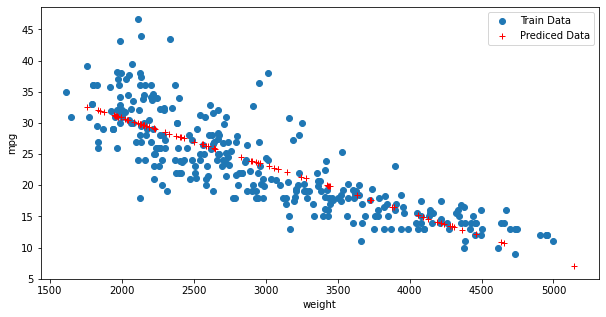

In [141]:
fig = plt.figure( figsize = ( 10, 5 ) )
ax = fig.add_subplot( 1, 1, 1 )
ax.plot( X_train, y_train, 'o', label = 'Train Data' )
ax.plot( X_test, y_predict, 'r+', label = 'Prediced Data' )
ax.legend( loc = 'best' )
plt.xlabel( 'weight' )
plt.ylabel( 'mpg' )
plt.show()

In [171]:
print( '연비를 예측하고 싶은 차의 중량을 입력하세요.')
weight_i = int( float( input( 'input weight : ' ) ) )

연비를 예측하고 싶은 차의 중량을 입력하세요.


input weight :  3433.0


In [172]:
data_i = np.asarray( weight_i )
data_i = data_i.reshape( -1, 1 )
data_n = scaler.transform( data_i )
data_n

array([[0.53782506]])

In [173]:
mpg_predict = model.predict( [ data_n[ 0 ] ]  )

print( f'이 자동차의 예상 연비는 {mpg_predict[0]} mpg' )

이 자동차의 예상 연비는 [19.91459232] mpg


## 다항 회귀

In [174]:
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

In [175]:
# 다항식 변환
poly = PolynomialFeatures( degree = 2 )
X_train_poly = poly.fit_transform( X_train_scaled )

In [176]:
print( f'원본 입력 데이터 shape : {X_train_scaled.shape}' )
print( f'2차항 변환 데이터 shape : {X_train_poly.shape}' )

원본 입력 데이터 shape : (313, 1)
2차항 변환 데이터 shape : (313, 3)


In [177]:
model.fit( X_train_poly, y_train )

LinearRegression()

In [178]:
X_test_poly = poly.fit_transform( X_test_scaled )

r_square = model.score( X_test_poly, y_test )
print( f'결정계수( R-제곱 ) : {r_square}' )

결정계수( R-제곱 ) : 0.711419878601763


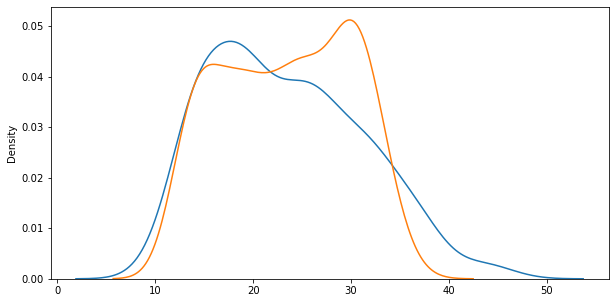

In [182]:
X_scaled = scaler.transform( X )
X_poly = poly.fit_transform( X_scaled )
y_hat = model.predict( X_poly )

plt.figure( figsize = ( 10, 5 ) )
ax1 = sns.distplot( y, hist = False, label = 'y' )
ax2 = sns.distplot( y_hat, hist = False, label = 'y_hat', ax = ax1 )
plt.show()

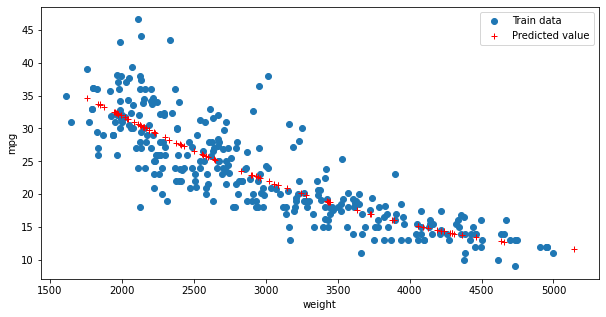

In [184]:
y_hat_test = model.predict( X_test_poly )

fig = plt.figure( figsize = ( 10, 5 ) )
ax = fig.add_subplot( 1, 1, 1 )
ax.plot( X_train, y_train, 'o', label = 'Train data' )
ax.plot( X_test, y_hat_test, 'r+', label = 'Predicted value' )
plt.legend( loc = 'best' )
plt.xlabel( 'weight' )
plt.ylabel( 'mpg' )
plt.show()

In [189]:
print( '연비를 예측하고 싶은 차의 중량을 입력하세요.')
weight_i = int( float( input( 'input weight : ' ) ) )

연비를 예측하고 싶은 차의 중량을 입력하세요.


input weight :  3433.0


In [190]:
data_i = np.asarray( weight_i )
data_i = data_i.reshape( -1, 1 )
data_n = scaler.transform( data_i )
data_n

array([[0.53782506]])

In [197]:
data_poly = poly.fit_transform( data_n )
mpg_predict = model.predict( [ data_poly[ 0 ] ]  )
print( f'이 자동차의 예상 연비는 {mpg_predict[ 0 ]} mpg' )

이 자동차의 예상 연비는 [18.83965636] mpg


## 다중 선형 회귀

In [220]:
#X = np.asarray( df[ [ 'cylinders', 'displacement', 'horsepower',
#                      'weight', 'acceleration' ] ] )
X = np.asarray( df[ [ 'displacement', 'horsepower', 'weight' ] ] )

In [221]:
print( f'X shape : {X.shape}' )
print( f'y shape : {y.shape}' )

X shape : (392, 3)
y shape : (392, 1)


### 훈련 데이터/테스트 데이터 분리

In [222]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 1234
)

In [223]:
print( f'X_train shape : {X_train.shape}' )
print( f'X_test shape : {X_test.shape}' )
print( f'y_train shape : {y_train.shape}' )
print( f'y_test shape : {y_test.shape}' )

X_train shape : (313, 3)
X_test shape : (79, 3)
y_train shape : (313, 1)
y_test shape : (79, 1)


### 입력 데이터 표준화( StandardScaler )

In [224]:
from sklearn.preprocessing import StandardScaler

In [225]:
scaler = StandardScaler()
scaler.fit( X_train )
X_train_scaled = scaler.transform( X_train )
X_test_scaled = scaler.transform( X_test )

In [226]:
print( f'X_train_scaled mean : {X_train_scaled.mean()}' )
print( f'X_train_scaled std : {X_train_scaled.std()}' )
print( f'\nX_test_scaled mean : {X_test_scaled.mean()}' )
print( f'X_test_scaled std : {X_test_scaled.std()}' )

X_train_scaled mean : 5.486086085474682e-17
X_train_scaled std : 0.9999999999999998

X_test_scaled mean : -0.06588862014806014
X_test_scaled std : 1.0778197181094826


### 다중 선형 회귀 모델 생성

In [227]:
model = LinearRegression()
model.fit( X_train_scaled, y_train )

LinearRegression()

### 모델 평가

y = W1 * cylinders + W2 * displacement + W3 * horsepower + W4 * weight + W5 * acceleration + b

In [228]:
print( f'다중 선형 회귀 모델 결정 계수 : {model.score( X_test_scaled, y_test ) }' )
print( f'\n다중 선형 회귀 모델 W( Weight )값 : {model.coef_}' )
print( f'다중 선형 회귀 모델 b( bias ) 값 : {model.intercept_}' )

다중 선형 회귀 모델 결정 계수 : 0.6793018184701729

다중 선형 회귀 모델 W( Weight )값 : [[-0.67091946 -1.8239105  -4.13025964]]
다중 선형 회귀 모델 b( bias ) 값 : [23.21565495]


### 평가 지표를 통한 다중 선형 회귀 모델 평가

In [229]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [230]:
y_predict = model.predict( X_test_scaled )

In [231]:
mae = mean_absolute_error( y_test, y_predict )
mse = mean_squared_error( y_test, y_predict )
rmse = np.sqrt( mse )
r2 = r2_score( y_test, y_predict )

In [232]:
print( f'MAE  : {mae:8.5f}' )
print( f'MSE  : {mse:8.5f}' )
print( f'RMSE : {rmse:8.5f}' )
print( f'R^2  : {r2:8.5f}' )

MAE  :  3.59411
MSE  : 22.80599
RMSE :  4.77556
R^2  :  0.67930


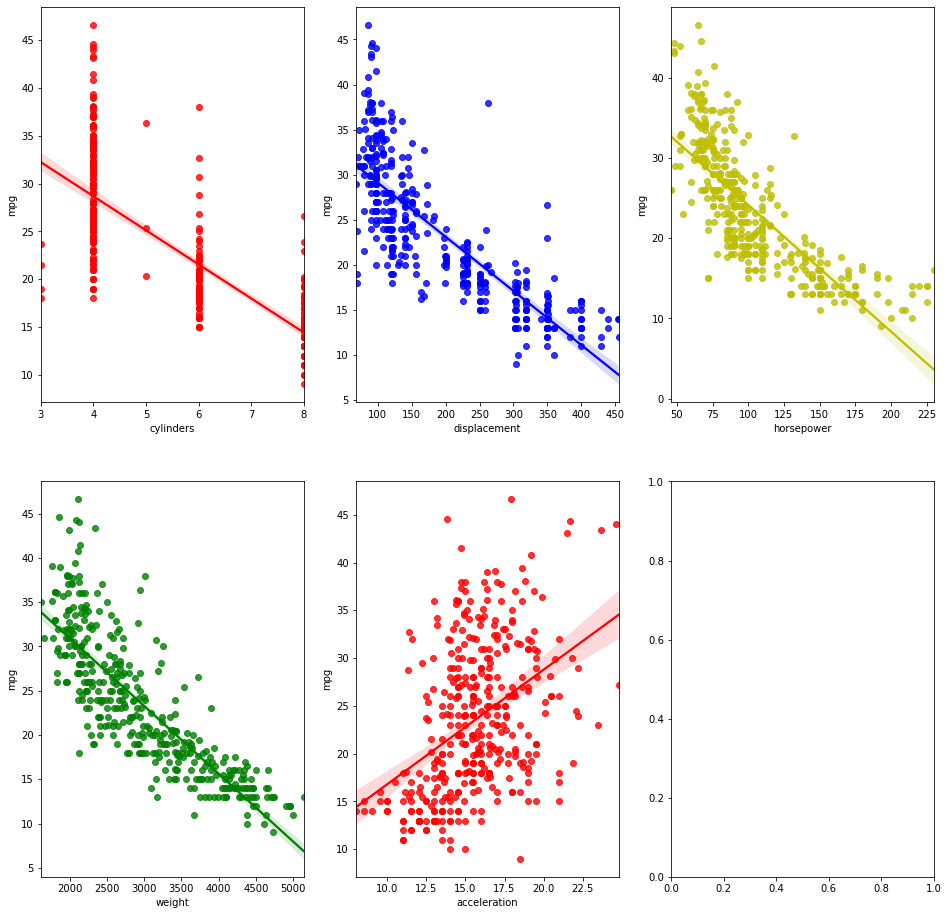

In [233]:
fig, axe = plt.subplots( figsize = ( 16, 16 ), ncols = 3, nrows = 2 )
X_features = [ 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration' ]
plot_color = [ 'r', 'b', 'y', 'g', 'r' ]

for i, feature in enumerate( X_features ):
    row = int( i / 3 )
    col = i % 3
    sns.regplot( x = feature, y = 'mpg', data = df,
                 ax = axe[ row ][ col ], color = plot_color[ i ] )

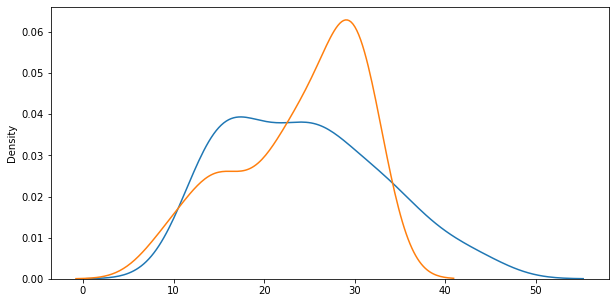

In [234]:
plt.figure( figsize = ( 10, 5 ) )
ax1 = sns.distplot( y_test, hist = False, label = 'y_test' )
ax2 = sns.distplot( y_predict, hist = False, label = 'y_predict', ax = ax1 )
plt.show()